{'lc1': 0.2952062352104039, 'lc2': 0.2040166276609382, 'lc3': 0.2688545361941629, 'lc4': 0.231922600934495}
{'lc1': 0.25, 'lc2': 0.25, 'lc3': 0.25, 'lc4': 0.25}
OrderedDict([('lc1', 0.125), ('lc2', 0.125), ('lc3', 0.125), ('lc4', 0.125), ('lc5', 0.125), ('lc6', 0.125), ('lc7', 0.125), ('lc8', 0.125)])


<AxesSubplot:>

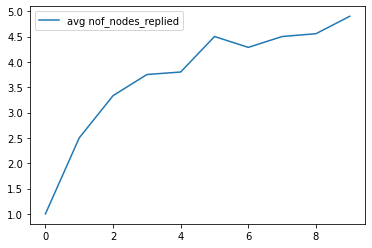

In [4]:
import eeverything as ee
import math
import collections
import random 
import generators as gen

def simulation_init_pools(simulation_initPools = 'democracy'):
  if (simulation_initPools == 'democracy'):
    institutional_pool_rules = gen.generate_rule_pool(8,0) #available pool for institution
    agent_pool_rules = gen.generate_rule_pool(6,0) #available pool for agents
    unknown_rules = gen.generate_rule_pool(2,6)
    to_be_added = []
  elif (simulation_initPools == 'tyranny'):
    institutional_pool_rules = gen.generate_rule_pool(8,0) #available pool for institution
    agent_pool_rules = [] #available pool for agents
    unknown_rules = []
    to_be_added = []
  elif (simulation_initPools == 'socialism'):
    institutional_pool_rules = [] #available pool for institution
    agent_pool_rules = gen.generate_rule_pool(6,0) #available pool for agents
    unknown_rules = gen.generate_rule_pool(2,6)
    to_be_added = []
  else: 
    institutional_pool_rules = gen.generate_rule_pool(8,0) #available pool for institution
    agent_pool_rules = gen.generate_rule_pool(8,0) #available pool for agents
    unknown_rules = gen.generate_rule_pool(0,0)  
    to_be_added = []  
  inst_lc_weights = {}
  inst_nof_rules = len(institutional_pool_rules)
  for lci in institutional_pool_rules:
    inst_lc_weights[lci]=1/inst_nof_rules     
  return (institutional_pool_rules, agent_pool_rules, unknown_rules, to_be_added, inst_lc_weights)

N = 100
m = math.ceil(N/4) #when less, less dense network
miu = 0.75 #Central nodes don't change

#define rules
mode = 'restart' #add or restart agent_rule_pool
simulation_initPools = 'democracy' # tyranny, socialism, democracy
institutional_pool_rules = gen.generate_rule_pool(8,0) #available pool for institution
#init ruleweights
inst_ruleweights_init = 'random' #'random', 'equal' -  2 ways to initialise weights of institution 
inst_weights = gen.generate_rule_weights_equal(institutional_pool_rules) #generate_rule_weights_equal
inst_weights = collections.OrderedDict(sorted(inst_weights.items()))

#rapid
agent_pool_rules = gen.generate_rule_pool(4,0) #available pool for agents
#institutional_pool_rules,agent_pool_rules,unknown_rules,to_be_added, inst_weights = simulation_init_pools(simulation_initPools)
unknown_rules = gen.generate_rule_pool(2,4)
unknown_rules2 = gen.generate_rule_pool(1,6)
unknown_rules3 = gen.generate_rule_pool(1,7)
to_be_added = []

#agents init
agent_ruleweights_init = 'random' #'random', 'equal' -  2 ways to initialise weights of agents
agent_mindset = 'altruistic' #'peer_altruistic','altruistic','selfish' 

#define participation
births = 0
deaths= 0
renew_population = 10000
nofactive=round(N/2)
birth_framework = 'random' # 'degree_attachment' , 'random'
death_framework = 'random' # 'age' , 'random' !!!ONLY RANDOM
elder_age = 100

#define resource distribution
initial_coins = 0
generated_resources = 100

#initial trust to the network 
trust_mode = 'average' #initial_trust_options: 'random', 'average', 'zero' and 'one'
ruletrust_mode = 'average' #ruletrust_mode: 'random', 'average', 'zero' and 'one'

#rule updates 
update_time = 5 #nof rounds
agents_update_threshold = 0.7 #triggers the update of the rules of the agents

#evaluation thresholds
eval_inst_threshold = 0.85
eval_agent_threshold = 0.7  #needs finetuning!!!!!
eval_method = 'order' #'order', 'amount'
#choose evaluation 
setting = 'simple_evaluation' # 'normal_evaluation', 'simple_evaluation'

#framework
framework = 'RTSI_rule_reason' #'RTSI', 'RTSI_rules', 'RTSI_rules_oracle','RTSI_rule_reason'
inst_adaptation = 'inactive' # 'active' , 'inactive'
knowledge_codification = 'advice' # 'bit', 'advice'
oracle_strategy = 'agents' #'agents', 'external', 'institution'
oracle_strategy_agents = 'agents'
e_factor = 0.5 #not useful
a_factor = 0.6 #not useful

#agents
ask_for_rules = 'network_oracle' #'network', 'oracle', 'network_oracle'
majority_method = 'max_rules' # 'max_rules', 'important_rules' - defines the method that the agents vote for rules

import eeverything
#oracle endorsments
rules_2_endorse = gen.generate_rule_pool(1,0)
weights_2_endorse = gen.init_agent_rule_weights_random(rules_2_endorse)
past_factor = 0.3 # if 0 you consider only present
present_factor = 0.7

SWSFmodel = ee.Model(inst_adaptation,past_factor,present_factor,majority_method,N,m,miu,round(N/2),institutional_pool_rules,agent_pool_rules, initial_coins,trust_mode,ruletrust_mode,inst_weights, update_time, agents_update_threshold, agent_mindset, birth_framework,eval_inst_threshold,eval_agent_threshold,framework, oracle_strategy,  oracle_strategy_agents, e_factor, a_factor,setting,death_framework,elder_age,knowledge_codification,eval_method,ask_for_rules,agent_ruleweights_init)

counter = 0
for i in range(10):
  rules_2_endorse = gen.generate_rule_pool(1,0)
  weights_2_endorse = gen.init_agent_rule_weights_random(rules_2_endorse)
  if (counter == renew_population):
    n_births = births
    n_deaths= births
    counter = 0
  else:
    counter +=1
    n_births = 0
    n_deaths= 0
  if (i == 100): #choose when to add rules
   to_be_added = unknown_rules
  elif (i == 400): #choose when to add rules
   to_be_added = unknown_rules2
  elif (i == 500): #choose when to add rules
   to_be_added = unknown_rules3
  G, central, notcentral = SWSFmodel.step(n_births, n_deaths, nofactive, to_be_added, mode, generated_resources, eval_inst_threshold,rules_2_endorse,weights_2_endorse) #death problem
  to_be_added = []

print(SWSFmodel.general_population_rules_dict)
print(SWSFmodel.optimal_rules_dict)
print(SWSFmodel.ilc_weights)

m_35 = SWSFmodel.dc_2.get_model_vars_dataframe()
m_35.head(n=1500)
m_35.plot()

# m_36 = SWSFmodel.datacollector_1.get_agent_vars_dataframe()
# m_36.head(n=1000)